## Simulación de la ecuación de onda
Vamos a intentar simular la ecuación de onda

$$ \frac{\partial^2}{\partial^2 t}u(x, t) = c^2 \frac{\partial^2}{\partial x^2}u(x, t) $$ 


Usando la funcion tradicional $d_t(x)$ y las propiedades de la Transformada de Fourier con respecto a la convolución. Dejando nuestra ecuación de la siguiente forma 

$$ \frac{\partial^2 }{\partial^2 t}\hat{u}(\omega, t) = c^2 \cdot \hat{d_t}(\omega) \cdot \hat{u}(\omega, t) $$


Donde cada punto $\omega$ se puede interpretar como su propia ecuación diferencial de primer orden. Esto es lo que usarmeos para resolver este problema.

Ahora, para resolver esta ecuación diferencial, que es de segundo orden, podemos resolverla simplemente así o podemos simplificarlo a un sistema de ecuaciones diferenciales de primer orden, dejando el sistema

$$ \begin{cases} 
    \frac{\partial}{\partial t}\hat{u}(\omega, t) = \hat{v}(\omega, t) \\
    \frac{\partial}{\partial t}\hat{v}(\omega, t) = c^2 \cdot \hat{d_t}(\omega) \cdot \hat{u}(\omega, t)
\end{cases} $$

Por lo tanto, ahora podriamos representar este sistema como matrices 

$$ 
    \begin{bmatrix} 
        \frac{\partial}{\partial t}\hat{u}(\omega, t) \\
        \frac{\partial}{\partial t}\hat{v}(\omega, t) \\
    \end{bmatrix}
    =
    \left(\begin{bmatrix} 
        0 && 1 \\
        0 && 0 \\
    \end{bmatrix} \cdot 1 
    + 
    \begin{bmatrix} 
        0 && 0 \\
        c^2 && 0 \\
    \end{bmatrix} 
    \cdot 
    \hat{d_t}(\omega) \right) 
    \cdot
    \begin{bmatrix} 
        \hat{u}(\omega, t) \\
        \hat{v}(\omega, t) \\
    \end{bmatrix} 
$$

Donde vemos que tenemos dos matrices de coeficientes, ya que hay dos funciones o kernels, para conformar este sistema de ecuaciones.

### Seteando el espacio
Vamos a crear el espacio, su transformación y la transformación de la aproximación tradicional.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm

In [2]:
radio = 100
cantidadPuntos = 1001
x = np.linspace(-radio, radio, cantidadPuntos)
dx = (2 * radio) / (cantidadPuntos - 1)

campoU = np.zeros(len(x))
campoU = 1 / np.cosh(x)

campoV = np.zeros(len(x))
centro = int(np.floor(cantidadPuntos / 2))
desviacion = 50
campoV[centro - desviacion : centro + desviacion] = -1
campoV = campoV * np.sin(x * 2 * np.pi / 20)

cantidadCampos = 2
campos = np.zeros([cantidadCampos, cantidadPuntos])
campos[0] = campoU
campos[1] = campoV

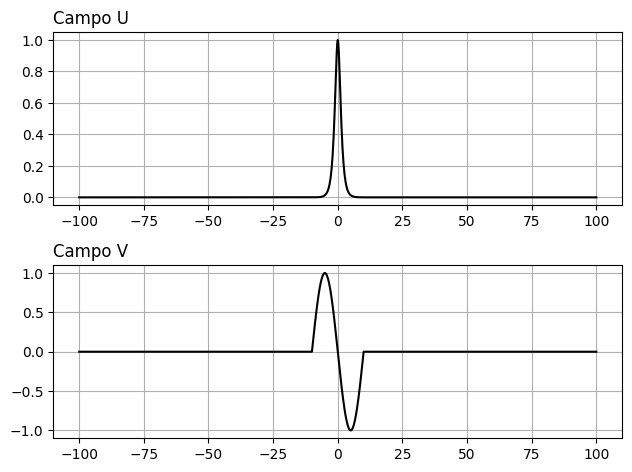

In [3]:
plt.figure()

plt.subplot(2, 1, 1)
plt.plot(x, campos[0], 'k-')
plt.grid(True)
plt.title('Campo U', loc = 'left')
plt.tight_layout(pad=1.0)

plt.subplot(2, 1, 2)
plt.plot(x, campos[1], 'k-')
plt.grid(True)
plt.title('Campo V', loc = 'left')
plt.tight_layout(pad=1.0)

plt.show()

Usando como constate $c^2 = 100$ y un delta de tiempo $dt = 0.001$

In [4]:
c = 10
dt = 0.0001

Tenemos dos kernels, que llamaremos $\hat{d_{2d}}(\omega)$ y $\hat{d_{0d}}(\omega)$, donde cumplen lo siguiente
$$ f(x) \ast d_{0d}(x) = f(x) $$
$$ f(x) \ast d_{2d}(x) = \frac{d^2}{dx^2}f(x) $$
Por lo tanto estas serían:

In [5]:
def AproximacionTradicional(x, dx, orden):
    largo = len(x)
    puntoMedio = int(np.floor(largo / 2))

    y = np.zeros(largo)
    valores = np.array([210, -120, 45, -10, 1])
    #valores = np.array([-56, 28, -8, 1])
    sumaTotal = np.sum(valores)

    for i, valor in enumerate(valores):
        valor /= 2 * (i + 1) * sumaTotal
        y[puntoMedio + i + 1] = -valor
        y[puntoMedio - i - 1] = valor

    y = np.fft.fft(np.fft.ifftshift(y / dx))
    return (y) ** orden

C:\Users\usuario\AppData\Local\Temp\ipykernel_16520\346013624.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  kernels[0] = kernel0D
C:\Users\usuario\AppData\Local\Temp\ipykernel_16520\346013624.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  kernels[1] = kernel2D


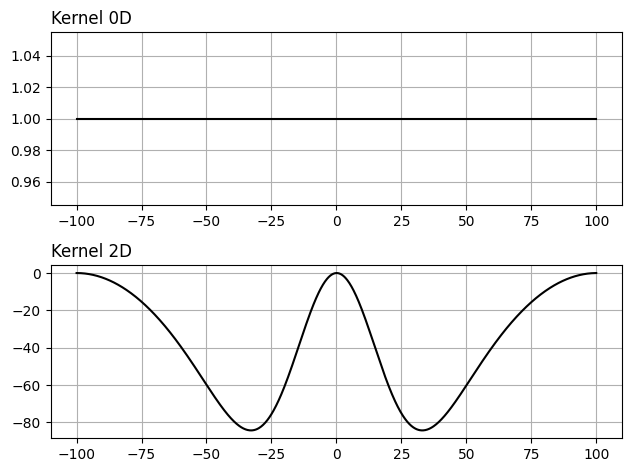

In [6]:
kernel0D = AproximacionTradicional(x, dx, 0)
kernel2D = AproximacionTradicional(x, dx, 2)

cantidadKernels = 2
kernels = np.zeros([cantidadKernels, cantidadPuntos])
kernels[0] = kernel0D
kernels[1] = kernel2D

plt.figure()

plt.subplot(2, 1, 1)
plt.plot(x, np.real(kernel0D), 'k-')
plt.grid(True)
plt.title('Kernel 0D', loc = 'left')
plt.tight_layout(pad=1.0)

plt.subplot(2, 1, 2)
plt.plot(x, np.real(kernel2D), 'k-')
plt.grid(True)
plt.title('Kernel 2D', loc = 'left')
plt.tight_layout(pad=1.0)

plt.show()

Por último, tenemos un problema ya que la matriz que mostramos al principio

$$ 
    \begin{bmatrix} 
        \frac{\partial}{\partial t}\hat{u}(\omega, t) \\
        \frac{\partial}{\partial t}\hat{v}(\omega, t) \\
    \end{bmatrix}
    =
    \left(\begin{bmatrix} 
        0 && 1 \\
        0 && 0 \\
    \end{bmatrix} 
    \cdot 
    \hat{d_{0D}}(\omega) 
    + 
    \begin{bmatrix} 
        0 && 0 \\
        c^2 && 0 \\
    \end{bmatrix} 
    \cdot 
    \hat{d_{2D}}(\omega) \right) 
    \cdot
    \begin{bmatrix} 
        \hat{u}(\omega, t) \\
        \hat{v}(\omega, t) \\
    \end{bmatrix} 
$$

Tiene el inconveniente que la matriz para resolver el sistema de ecuaciones depende de $\omega$, y simplificando, sería
$$ 
    \frac{\partial}{\partial t}\hat{U}(\omega, t) = A(\omega) \cdot \hat{U}(\omega, t)
$$

Tenemos la ventaja que no depende de nuestra variable $t$ en la que estamos haciendo la diferenciación. Por lo tanto funciona como constante para la ecuación pero sería mejor si fuera constante también espacialmente, y de esa forma no tener que calcular dicha matriz. Por lo que nos serviría una transformación más donde fuera lineal.

Podemos transformar de nuevo el espacio, para tener una solución más simple con una descomposición de autovalores y autovector, de la siguiente manera 
$$ A(\omega) = T(\omega) \cdot D(\omega) \cdot T^{-1}(\omega) $$

Donde diremos que $\hat{Z}(\omega, t) = T^{-1}(\omega) * \hat{U}(\omega, t)$ por lo tanto transformando el problema en el siguiente

$$ \frac{\partial}{\partial t}\hat{Z}(\omega, t) = D(\omega) \cdot \hat{z}(\omega, t) $$

Donde $D(\omega)$ es una matriz diagonal.

Por lo tanto podemos tener una transformación conjunta, donde se aplica la transformación de Fourier y despúes se aplica esta transformación. Estaría bueno poder aplicarlas simultaneamente, o por lo menos generalizarla para no tener que aplicarla en cada punto.

Por ahora vamos a simplemente tener otra funcion más que será $D(\omega)$. Pero recordando que estamos resolviendo numericamente, y usando el método de backward euler, tenemos el siguiente sistema

$$ \hat{Z}(\omega, t_{n+1}) = \hat{Z}(\omega, t_{n}) + dt \cdot D(\omega) \cdot \hat{Z}(\omega, t_{n+1}) $$

por lo tanto despejando $\hat{Z}(\omega, t_{n+1})$ tenemos

$$ \hat{Z}(\omega, t_{n+1}) = \left(\mathbb{I} - dt \cdot D(\omega) \right)^{-1} \hat{Z}(\omega, t_{n}) $$

Notemos como $\left(\mathbb{I} - dt \cdot D(\omega) \right)$ es una matriz diagonal, por lo tanto la inversa de dicha matriz es la inversa de sus componentes. También notemos que siempre va a existir un $dt$ suficientemente chico para no dividir por $0$.

Tiene la ventaja de solo tener que guardar $n$ datos, para cada punto, donde $n$ es la cantidad de ecuaciones. Por lo tanto en total se tiene $n + m + 1$ valores por cada punto, donde $m$ es la cantidad de kernels, y el $+1$ es por el valor en si mismo. Todos esos puntos sumados las $m$ matrices de $n \times n$.

In [7]:
def TransformacionDelCampo(campoActual, cantidadPuntos, kernels, coeficientes, cantidadCoeficientes):
    campoTransformado = np.fft.fft(campoActual)
    nuevosCoeficientes = np.zeros([cantidadPuntos, cantidadCoeficientes], dtype = complex)

    for i in range(cantidadPuntos):
        matriz = np.zeros([cantidadCoeficientes, cantidadCoeficientes])
        for j in range(len(coeficientes)):
            matriz += coeficientes[j] * kernels[j, i]
        
        values, vectors = np.linalg.eig(matriz)
        nuevosCoeficientes[i, :] = values
        campoTransformado[:, i] = np.linalg.inv(vectors) @ campoTransformado[:, i]

    return campoTransformado, nuevosCoeficientes

In [8]:
def DestransformacionDelCampo(campoTransformado, cantidadPuntos, kernels, coeficientes, cantidadCoeficientes):
    
    for i in range(cantidadPuntos):
        matriz = np.zeros([cantidadCoeficientes, cantidadCoeficientes])
        for j in range(len(coeficientes)):
            matriz += coeficientes[j] * kernels[j, i] 
        
        _, vectors = np.linalg.eig(matriz)
        campoTransformado[:, i] = vectors @ campoTransformado[:, i]

    campoDestrasformado = np.fft.ifft(campoTransformado)

    return np.real(campoDestrasformado)

In [9]:
coeficientes0D = np.array([[0, 1], [0, 0]])
coeficientes2D = np.array([[0, 0], [c ** 2, 0]])

coeficientes = np.zeros([cantidadCampos, cantidadCampos, cantidadKernels])
coeficientes[:, :, 0] = coeficientes0D
coeficientes[:, :, 1] = coeficientes2D
cantidadCoeficientes = 2

In [10]:
camposTransformados, nuevosCoeficientes = TransformacionDelCampo(campos, cantidadPuntos, kernels, coeficientes, cantidadCoeficientes)

### Simular
Ahora vamos a simular aplicando el método de backward Euler para avanzar la ecuación diferencial.

In [11]:
def FuncionIteracion(campos, coeficientes):
    camposResultado = np.zeros([cantidadCampos, cantidadPuntos], dtype = complex)
    for i in range(cantidadCampos):
        camposResultado[:, i] = campos[:, i] / coeficientes[i, :]
    return camposResultado  

cantidadPasos = 20
cantidadIteracionesIntermedias = 150

resultado = np.zeros([cantidadPasos, cantidadCampos, cantidadPuntos])

In [12]:
def AvanzarSimulacion(funcion, dt, estadoActual):
    k1 = funcion(estadoActual)
    k2 = funcion(estadoActual + k1 * estadoActual / 2)
    k3 = funcion(estadoActual + k2 * estadoActual / 2)
    k4 = funcion(estadoActual + k3 * estadoActual)

    paso = np.array(k1 + 2 * k2 + 2 * k3 + k4)

    return estadoActual + (dt / 6) * paso

In [13]:
destransformar = lambda campo : DestransformacionDelCampo(campo, cantidadPuntos, kernels, coeficientes, cantidadCoeficientes)

resultado[0, :, :] = destransformar(camposTransformados)
for paso in range(1, cantidadPasos):

    for pasoIntermedio in range(cantidadIteracionesIntermedias):
        camposTransformados = AvanzarSimulacion(lambda campo : FuncionIteracion(campo, nuevosCoeficientes), dt, camposTransformados)

    resultado[paso, :, :] = destransformar(camposTransformados)


C:\Users\usuario\AppData\Local\Temp\ipykernel_16520\3424063733.py:4: RuntimeWarning: divide by zero encountered in divide
  camposResultado[:, i] = campos[:, i] / coeficientes[i, :]
C:\Users\usuario\AppData\Local\Temp\ipykernel_16520\3424063733.py:4: RuntimeWarning: invalid value encountered in divide
  camposResultado[:, i] = campos[:, i] / coeficientes[i, :]
C:\Users\usuario\AppData\Local\Temp\ipykernel_16520\4053465915.py:3: RuntimeWarning: invalid value encountered in multiply
  k2 = funcion(estadoActual + k1 * estadoActual / 2)
C:\Users\usuario\AppData\Local\Temp\ipykernel_16520\4053465915.py:5: RuntimeWarning: overflow encountered in multiply
  k4 = funcion(estadoActual + k3 * estadoActual)
C:\Users\usuario\AppData\Local\Temp\ipykernel_16520\4053465915.py:5: RuntimeWarning: invalid value encountered in multiply
  k4 = funcion(estadoActual + k3 * estadoActual)


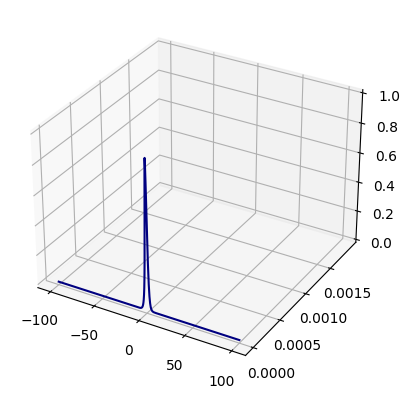

In [14]:
campoAGraficar = 0

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.set_cmap('jet_r')
for j in range(cantidadPasos):
    ys = j * np.ones(cantidadPuntos) * dt
    ax.plot(x, ys, resultado[j, campoAGraficar, :], color = cm.jet(j * 11))

plt.show()